> Texto fornecido sob a Creative Commons Attribution license, CC-BY. Todo o código está disponível sob a FSF-approved BSD-3 license.<br>
> (c) Original por Lorena A. Barba, Gilbert F. Forsyth em 2017, traduzido por Felipe N. Schuch em 2020.<br>
> [@LorenaABarba](https://twitter.com/LorenaABarba) - [@fschuch](https://twitter.com/fschuch)

12 passos para Navier-Stokes
======
***

Esse notebook continua a apresentação dos **12 passos para Navier-Stokes**, um módulo prático aplicado como um curso interativo de Dinâmica dos Fluidos Computacional (CFD, do Inglês *Computational Fluid Dynamics*), por [Prof. Lorena Barba](http://lorenabarba.com). Adaptado e traduzido para português por [Felipe N. Schuch](https://fschuch.github.io/). Você deve completar o [Passo 1](./01_Passo_1.ipynb) antes de continuar, tendo escrito seu próprio script Python ou notebook, e tendo experimentado variar os parâmetros de discretização e observado o que aconteceu.

Passo 2: Convecção não Linear
-----
***

Aqui iremos implementar a equação de convecção não linear, com os mesmos métodos empregados no passo anterior. A equação convectiva unidimensional é escrita como:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Perceba que em vez de uma constante $c$ multiplicando o segundo termo, ele é agora multiplicado pela própria solução $u$. Portanto, o segundo termo da equação é agora denominado *não linear*. Vamos usar a mesma discretização do Passo 1: diferença para frente para a derivada temporal e diferença para trás para a derivada espacial.
A equação discretizada é dado por:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Isolando o termo com a única incógnita, $u_i^{n+1}$, temos:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

Como antes, o código Python começa ao importar as bibliotecas necessárias. Então, declaramos alguns parâmetros que determinam a discretização no espaço e no tempo (você deve experimentar alterar esses valores e ver o que acontece). Finalmente, definimos a condição inicial (CI) ao inicializar o arranjo para a solução usando $u_0 = 2$ onde $ 0,5 \leq x \leq 1 $, senão $u = 1$, no intervalo $0 \le x \le 2$ (i.e., função chapéu).

In [1]:
import numpy                  #Aqui carregamos numpy
from matplotlib import pyplot #Aqui carregamos matplotlib
%matplotlib inline

x = numpy.linspace(0., 2., num = 41)
nt = 20    #Número de passos de tempo que queremos calcular
dt = .025  #Tamanho de cada passo de tempo

nx = x.size
dx = x[1] - x[0]
u = numpy.ones_like(x)   #Como antes, iniciamos o u com todos os valores 1
u[(0.5<=x) & (x<=1)] = 2 #Então definimos u = 2 entre 0,5 e 1, nossa CI

un = numpy.ones_like(u) #Inicializar o arranjo temporário, para manter a solução no passo de tempo

O código no bloco abaixo está *incompleto*. Nós apenas copiamos as linhas do [Passo 1](./01_Passo_1.ipynb), que executavam o avanço temporal. Será que você pode editar o código para que dessa vez execute a convecção não linear?

In [ ]:
for n in range(nt): #Laço temporal
    un = u.copy() ##Cópia dos valores de u para un
    for i in range(1, nx):  ##Laço espacial
    
        ###A linha abaixo foi copiada do Passo 1. Edite ela de acordo com a nova equação.
        ###Então descomente e execute a célula para calcular o resultado do Passo 2.
      
        ###u[i] = un[i] - c * dt / dx * (un[i] - un[i-1]) 

        
pyplot.plot(x, u) ##Plot the results

Quais diferenças você observou para a evolução da função chapéu em comparação com o caso linear? O que acontece se você modificar os parâmetros numéricos e executar o código novamente?

Após refletir sobre essas questões, você pode prosseguir para o arquivo complementar [Convergência e condição CFL](./03_Condicao_CFL.ipynb), ou ir direto para o [Passo 3](./04_Passo_3.ipynb).

Material Complementar
-----
***

Para uma explicação passo à passo sobre a discretização da equaçaõ de convecção linear com diferenças finitas (e também os passos seguintes, até o Passo 4), assista **Video Lesson 4** por Prof. Barba no YouTube.

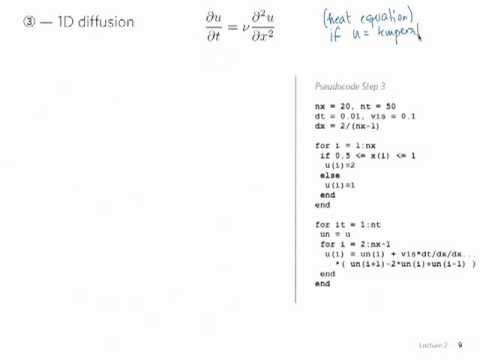

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('y2WaK7_iMRI')

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> A célula acima executa o estilo para esse notebook. Nós modificamos o estilo encontrado no GitHub de [CamDavidsonPilon](https://github.com/CamDavidsonPilon), [@Cmrn_DP](https://twitter.com/cmrn_dp).